In [18]:
#start
import pandas as pd
import numpy as np
#visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.cm as cm
#scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

### Loading and Simple exploratory

In [2]:
data=pd.read_csv('countryriskdata.csv')
master=data.copy()

In [3]:
data.head()

,Country,Abbrev,Corruption,Peace,Legal,GDP Growth
0,Albania,AL,39,1.867,3.822,3.403
1,Algeria,DZ,34,2.213,4.160,4.202
2,Argentina,AR,36,1.957,4.568,-2.298
3,Armenia,AM,33,2.218,4.126,0.208
4,Australia,AU,79,1.465,8.244,2.471


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     122 non-null    object 
 1   Abbrev      122 non-null    object 
 2   Corruption  122 non-null    int64  
 3   Peace       122 non-null    float64
 4   Legal       122 non-null    float64
 5   GDP Growth  122 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 5.8+ KB


In [5]:
data.describe()

,Corruption,Peace,Legal,GDP Growth
count,122.000000,122.000000,122.000000,122.000000
mean,46.237705,2.003730,5.598861,2.372566
std,19.126397,0.447826,1.487328,3.241424
min,14.000000,1.192000,2.728000,-18.000000
25%,31.250000,1.684750,4.571750,1.432250
50%,40.000000,1.969000,5.274000,2.496000
75%,58.750000,2.280500,6.476750,4.080000
max,90.000000,3.399000,8.633000,7.958000


### Normalization

In [6]:
#                             *** Normalization***
scaler = StandardScaler()
data[['Corruption','Peace','Legal','GDP Growth']] = scaler.fit_transform(
    data[['Corruption','Peace','Legal','GDP Growth']] .values)

### Plotting

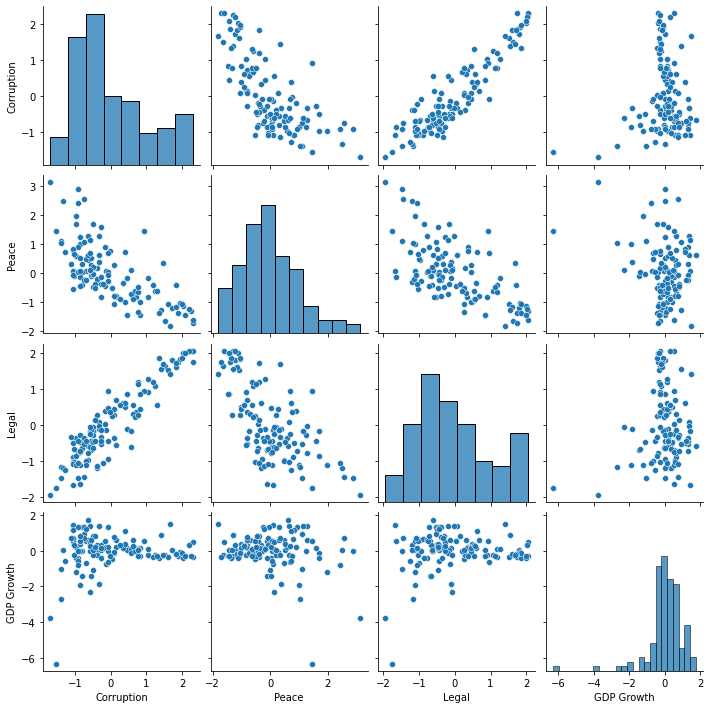

In [7]:
sns.pairplot(data)
plt.show()
#GDP skewed noted

### Pick features

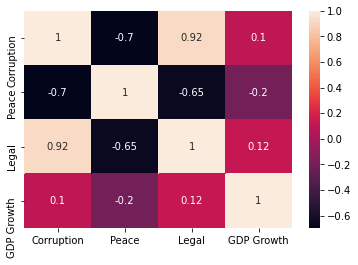

In [8]:
sns.heatmap(data.corr(), annot=True)
plt.show()
#strong correlation between legal and corruption

In [9]:
#droping one of the columns due to high correlation with another one
data=data.drop('Corruption',axis=1)

In [10]:
X=data[['Peace','Legal','GDP Growth']]

### K mean cluster
Perform elbow method

C:\Users\Farshad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


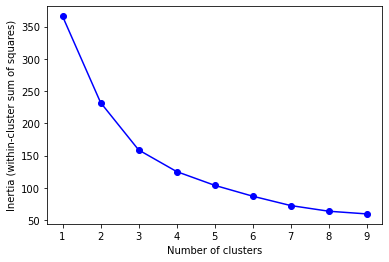

In [11]:
Ks = range(1, 10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

### K means with k=3

In [12]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=2 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=2 is 158.61675490853293
cluster centers:  [[ 2.66780863e-01 -4.53028288e-01  3.64618269e-01]
 [-9.73782183e-01  1.17699986e+00  1.73907018e-03]
 [ 1.39783040e+00 -1.04600305e+00 -1.80189173e+00]]
cluster labels:  [0 0 2 0 1 1 2 0 0 1 0 0 0 1 2 0 2 0 1 2 1 0 0 1 0 0 1 2 1 0 2 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 2 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 1 0 2 1 0 0 0 0 0 0 1 1 1 0 2 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 2 0 0
 0 2 1 1 1 1 2 0 2 0 0]


### Visualize the result (3 2D plots)

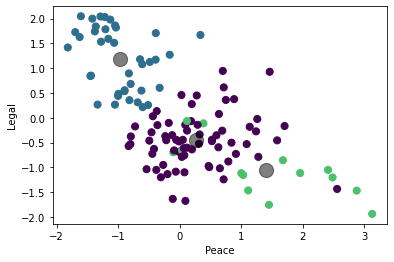

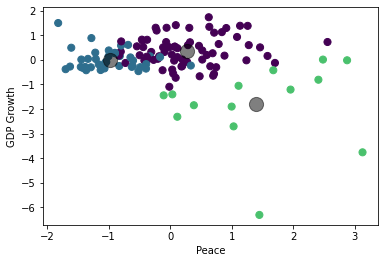

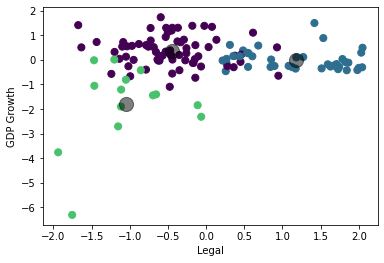

In [13]:
%matplotlib inline

# set up the color
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

centers = kmeans.cluster_centers_

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=50)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=200, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

### List of results

In [15]:
result = pd.DataFrame({'Country':master['Country'], 'Abbrev':master['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
0                         Albania     AL      0
73                     Mozambique     MZ      0
72                        Morocco     MA      0
71                     Montenegro     ME      0
70                        Moldova     FM      0
69                         Mexico     MX      0
67                     Mauritania     MR      0
66                           Mali     ML      0
64                         Malawi     MW      0
63                     Madagascar     MG      0
61                        Liberia     LR      0
120                        Zambia     ZM      0
59                         Latvia     LV      0
58                         Kuwait     KW      0
56                          Kenya     KE      0
55                     Kazakhstan     KZ      0
54                         Jordan     JO      0
52                        Jamaica     JM      0
50                         Israel     IL      0
48                           Iran     ID

In [17]:
# Silhouette Analysis
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_labels)
    print("For n_clusters=", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters= 2 The average silhouette_score is : 0.3630420703158315
For n_clusters= 3 The average silhouette_score is : 0.3875739370704894
For n_clusters= 4 The average silhouette_score is : 0.37041086718336225
For n_clusters= 5 The average silhouette_score is : 0.30937227721525684
For n_clusters= 6 The average silhouette_score is : 0.30276322800901334
For n_clusters= 7 The average silhouette_score is : 0.3148738253240533
For n_clusters= 8 The average silhouette_score is : 0.3211329731549249
For n_clusters= 9 The average silhouette_score is : 0.2919968985290434
For n_clusters= 10 The average silhouette_score is : 0.30481375134975786
